# Lab | Customer Analysis Round 2 - scroll down for Round 3

For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

*Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.*

- Dealing with the data
- Show the dataframe shape.
- Standardize header names.
- Which columns are numerical?
- Which columns are categorical?
- Check and deal with NaN values.
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
- BONUS: Put all the previously mentioned data transformations into a function.

In [98]:
import pandas as pd
file1 = pd.read_csv('/Users/Ana/Desktop/Ironhack/Week_1/Day_2/Afternoon/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [99]:
file1.shape

(10910, 26)

In [100]:
file1.head(30)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
9,9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN


In [101]:
#to standardize header names we must change ' ' for '_' and make it lowercase. We use a loop for it
cols = [] #  empty list to store the new column names
for i in range(len(file1.columns)):
    cols.append(file1.columns[i].lower())
    
file1.columns = cols

cols2 = []
for i in range(len(file1.columns)):
    cols2.append(file1.columns[i].replace(' ','_'))
    
file1.columns = cols2

file1.T.head(27)


,0,1,2,3,4,5,6,7,8,9,...,10900,10901,10902,10903,10904,10905,10906,10907,10908,10909
unnamed:_0,0,1,2,3,4,5,6,7,8,9,...,10900,10901,10902,10903,10904,10905,10906,10907,10908,10909
customer,DK49336,KX64629,LZ68649,XL78013,QA50777,HO81102,IW72280,IH64929,FM55990,QX31376,...,VN73653,RY92254,PP30874,SU71163,QI63521,FE99816,KX53892,TL39050,WA60547,IV32877
state,Arizona,California,Washington,Oregon,Oregon,NaN,California,California,California,Oregon,...,Oregon,Washington,California,Arizona,Nevada,Nevada,Oregon,Arizona,California,NaN
customer_lifetime_value,4809.21696,2228.525238,14947.9173,22332.43946,9025.067525,4745.181764,5035.035257,4956.247235,5989.773931,17114.32815,...,6423.739052,4547.892543,3579.023825,2771.663013,19228.46362,15563.36944,5259.444853,23893.3041,11971.97765,6857.519928
response,No,No,No,Yes,No,NaN,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,NaN
coverage,Basic,Basic,Basic,Extended,Premium,Basic,Basic,Basic,Premium,Extended,...,Basic,Premium,Extended,Basic,Basic,Premium,Basic,Extended,Premium,Basic
education,College,College,Bachelor,College,Bachelor,High School or Below,Doctor,High School or Below,College,Master,...,College,Bachelor,High School or Below,College,High School or Below,Bachelor,College,Bachelor,College,Bachelor
effective_to_date,2/18/11,1/18/11,2/10/11,1/11/11,1/17/11,2/14/11,2/14/11,2/24/11,1/19/11,1/4/11,...,2/13/11,1/13/11,1/24/11,1/7/11,2/24/11,1/19/11,1/6/11,2/6/11,2/13/11,1/8/11
employmentstatus,Employed,Unemployed,Employed,Employed,Medical Leave,Employed,Employed,Employed,Employed,Employed,...,Unemployed,Employed,Employed,Employed,Unemployed,Unemployed,Employed,Employed,Employed,Unemployed
gender,M,F,M,M,F,M,F,M,M,F,...,M,M,F,M,M,F,F,F,F,M


In [102]:
file1.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

- Which columns are numerical?
    'unnamed:_0', 'customer_lifetime_value', 'number_of_open_complaints','number_of_policies', 'total_claim_amount'
- Which columns are categorical?
    the rest

In [103]:
file1.info


<bound method DataFrame.info of        unnamed:_0 customer       state  customer_lifetime_value response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       coverage education effective_to_date employments

In [104]:
df1 = file1.copy()

In [105]:
df1.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [106]:
# fields with missing values: vehicle_type, vehicle_size, vehicle_class, 
# number_of_open_complaints, months_since_last_claim, response, state

# for categorical values like state, vehicle_class, vehicle_size, we can use the Mode to fill NaNs
# vehicle_type is also categorical but half of it is made of empty values so probably it will be better to drop the whole column in this case

# 'response' is a boolean and we can assume if we don't have the information
# is because the customers did not reply - missing values become a NO

#  same with 'number of open complaints' - if we don't have the information is bc 
#  the customer did not complain so we can assume it to be 0

# the column 'unknown: 0' can be dropped as it is a copy of the index

# for months_since_last_claim, we assume this is the people who never had a claim, 
# therefore their values should be the avg 

In [107]:
# lets make this changes in another copy

#first we remove the columns ['vehicle_type','unnamed:_0']

df2 = df1.copy()
df2 = df2.drop(['vehicle_type','unnamed:_0'], axis=1)
df2.info

<bound method DataFrame.info of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      education effective_to_date employmentstatus gender  income  ...  \
0    

In [108]:
df2 = df2[df2['number_of_open_complaints'].isna()==False] #it replaces the missing values for 0
df2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,50549,...,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize


In [109]:
#df2 = df2[df2['number_of_open_complaints'].isna()==False].head(10) #it replaces the missing values for 0
df2.info

<bound method DataFrame.info of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
5      HO81102         NaN              4745.181764      NaN     Basic   
...        ...         ...                      ...      ...       ...   
10904  QI63521      Nevada             19228.463620       No     Basic   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

                  education effective_to_date employmentstatus gender  income  

In [110]:
# for categorical values like state, vehicle_class, vehicle_size, we can use the Mode to fill NaNs
# so we define it 

import numpy as np
mode_state = df2['state'].mode()
mode_vehicle_class = df2['vehicle_class'].mode()
mode_vehicle_size = df2['vehicle_size'].mode()

print(mode_state)
print(mode_vehicle_class)
print(mode_vehicle_size)

0    California
Name: state, dtype: object
0    Four-Door Car
Name: vehicle_class, dtype: object
0    Medsize
Name: vehicle_size, dtype: object


In [111]:
#then i use that method .fillna() to replace all values that are empty with our mean

df2['state'] = df2['state'].fillna(mode_state) 
df2['vehicle_class'] = df2['vehicle_class'].fillna(mode_vehicle_class) 
df2['vehicle_size'] = df2['vehicle_size'].fillna(mode_vehicle_size) 

/var/folders/c4/gkk8fwkd3_97953flvqssh700000gn/T/ipykernel_6975/2430350989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['state'] = df2['state'].fillna(mode_state)
/var/folders/c4/gkk8fwkd3_97953flvqssh700000gn/T/ipykernel_6975/2430350989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vehicle_class'] = df2['vehicle_class'].fillna(mode_vehicle_class)
/var/folders/c4/gkk8fwkd3_97953flvqssh700000gn/T/ipykernel_6975/2430350989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

In [112]:
# for months_since_last_claim, we assume this is the people who never had a claim, 
# therefore their values should be the avg 

avg_mslc = df2['months_since_last_claim'].mean()
print(avg_mslc)

15.149070740488469


In [113]:
df2['months_since_last_claim'] = df2['months_since_last_claim'].fillna(avg_mslc)

/var/folders/c4/gkk8fwkd3_97953flvqssh700000gn/T/ipykernel_6975/3629932422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['months_since_last_claim'] = df2['months_since_last_claim'].fillna(avg_mslc)


In [114]:
# 'response' is a boolean (Yes/No and we can assume if we don't have the information
# is because the customers did not reply - missing values become a NO

df2['response'] = df2['response'].fillna('No') 
df2.head(10)

/var/folders/c4/gkk8fwkd3_97953flvqssh700000gn/T/ipykernel_6975/4266590622.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['response'] = df2['response'].fillna('No')


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
5,HO81102,NaN,4745.181764,No,Basic,High School or Below,2/14/11,Employed,M,50549,...,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize
7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,...,45,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize
8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,...,24,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize
9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,70961,...,8,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,31,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large


In [115]:
# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [116]:
df2['effective_to_date'] = pd.to_datetime(df2['effective_to_date'],errors = 'coerce')
display(df2.head())
print(df2.dtypes)

/var/folders/c4/gkk8fwkd3_97953flvqssh700000gn/T/ipykernel_6975/1590901627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['effective_to_date'] = pd.to_datetime(df2['effective_to_date'],errors = 'coerce')


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
5,HO81102,NaN,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,...,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [117]:
import pandas as pd

df3 = df2.copy()
df3['month'] = pd.to_datetime(df3['effective_to_date']).dt.strftime('%B') #to show the month with letters


df3.head

<bound method NDFrame.head of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
5      HO81102         NaN              4745.181764       No     Basic   
...        ...         ...                      ...      ...       ...   
10904  QI63521      Nevada             19228.463620       No     Basic   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928       No     Basic   

                  education effective_to_date employmentstatus gender  income  \


In [118]:
df3[(df3['month'] == 'February')|(df3['month']== 'January')]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,January
5,HO81102,NaN,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,February
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,February
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,February




# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 3`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.


In [119]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10277 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10277 non-null  object        
 1   state                          9688 non-null   object        
 2   customer_lifetime_value        10277 non-null  float64       
 3   response                       10277 non-null  object        
 4   coverage                       10277 non-null  object        
 5   education                      10277 non-null  object        
 6   effective_to_date              10277 non-null  datetime64[ns]
 7   employmentstatus               10277 non-null  object        
 8   gender                         10277 non-null  object        
 9   income                         10277 non-null  int64         
 10  location_code                  10277 non-null  object        
 11  marital_status 

In [120]:
df3.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000,10277.000000
mean,8030.503327,37648.597743,93.192274,15.149071,48.087769,0.384256,2.965846,433.874870
std,6930.733408,30377.415086,34.512179,10.080349,27.936582,0.912457,2.390763,291.681330
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4002.857594,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.074379
50%,5764.862315,33938.000000,83.000000,14.000000,48.000000,0.000000,2.000000,380.917107
75%,8986.610653,62326.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [121]:
# Show a plot of the total number of responses. - plot of the total number of responses (yes and no)

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [124]:
df3['response'].value_counts()

No     8889
Yes    1388
Name: response, dtype: int64

In [125]:
df3['response'].unique()

array(['No', 'Yes'], dtype=object)

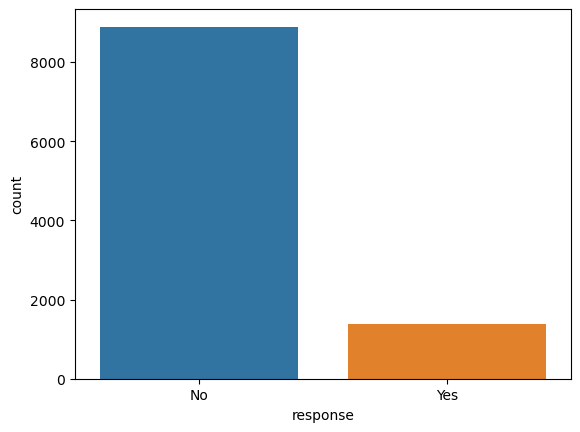

In [128]:
sns.countplot(data=df3, x="response")
plt.show()

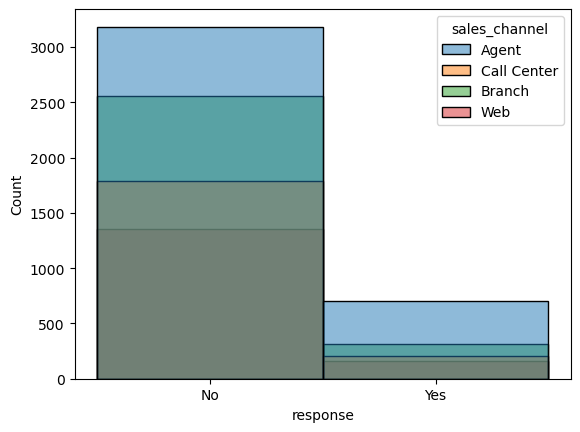

In [132]:
# Show a plot of the response rate by the sales channel.


sns.histplot(data=df3, bins=20,x='response', hue="sales_channel")
plt.show()

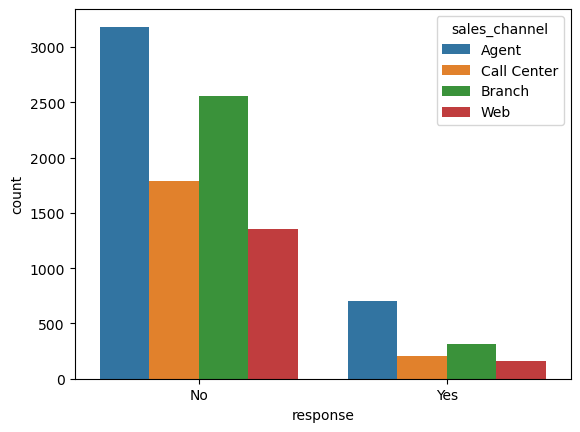

In [134]:
plt.figure()
plotrrsc = sns.countplot(data=df3, x="response", hue="sales_channel")
plt.show()

# a bit more clear this way

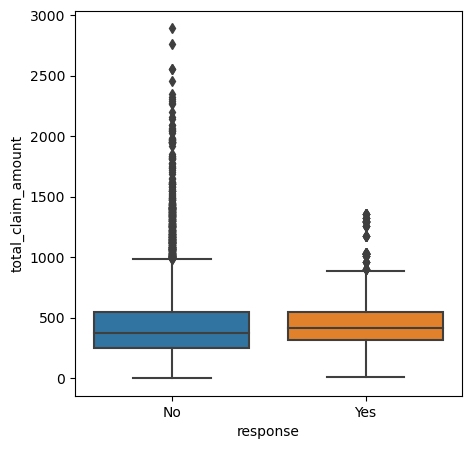

In [139]:
# Show a plot of the response rate by the total claim amount
plt.figure(figsize=(5,5))

sns.boxplot(x ='response', y='total_claim_amount', data=df3)
plt.show()

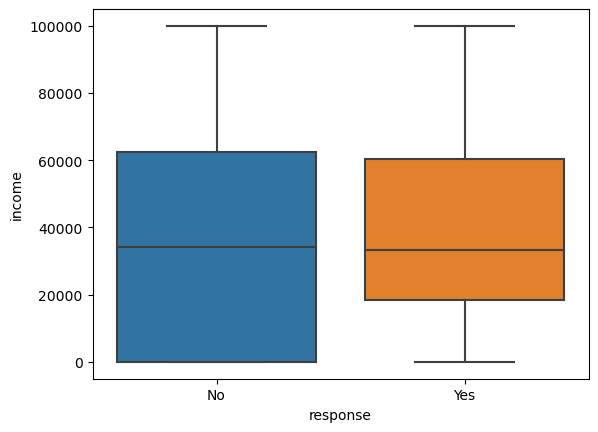

In [150]:
# Show a plot of the response rate by income

#plt.figure(figsize=(10,5))
#plotrri = sns.countplot(data=df3, x="response", hue="income")

#plotrri = sns.histplot(x='response', hue='income', data=df3)
#plt.show()

#plotrri = sns.histplot(x=df3['response'], hue=df3['income'],bins='auto',stat='count')  
#plt.show()

#as the magnitude is too different between the values, the graphs are very unbalanced, I should log the values for salary?

#sns.barplot(x="response", y="income", data=df3)
#plt.show()

sns.boxplot(x ='response', y='income', data=df3)
plt.show()